# Bonus: Temperature Analysis I

In [124]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [125]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [126]:
# Convert the date column format from string to datetime
df['date']=pd.to_datetime(df['date'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [128]:
# Set the date column as the DataFrame index
df.set_index('date',inplace=True)

In [129]:
# Drop the date column
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


### Compare June and December data across all years 

In [130]:
from scipy import stats
import datetime as dt
from scipy.stats import ttest_rel


In [131]:
# Filter data for desired months
June_dec_df=df.loc[(df.index.month_name()=='June')|(df.index.month_name()=='December')]
June_dec_df['month']=pd.DatetimeIndex(June_dec_df.index).month_name()
June_dec_df


,station,prcp,tobs,month
date,,,,
2010-06-01,USC00519397,0.00,78,June
2010-06-02,USC00519397,0.01,76,June
2010-06-03,USC00519397,0.00,78,June
2010-06-04,USC00519397,0.00,76,June
2010-06-05,USC00519397,0.00,77,June
...,...,...,...,...
2017-06-26,USC00516128,0.02,79,June
2017-06-27,USC00516128,0.10,74,June
2017-06-28,USC00516128,0.02,74,June


In [132]:
# Identify the average temperature for June and December
June_dec_df.groupby('month').describe()['tobs']

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
December,1517.0,71.041529,3.745920,56.0,69.0,71.0,74.0,83.0
June,1700.0,74.944118,3.257417,64.0,73.0,75.0,77.0,85.0


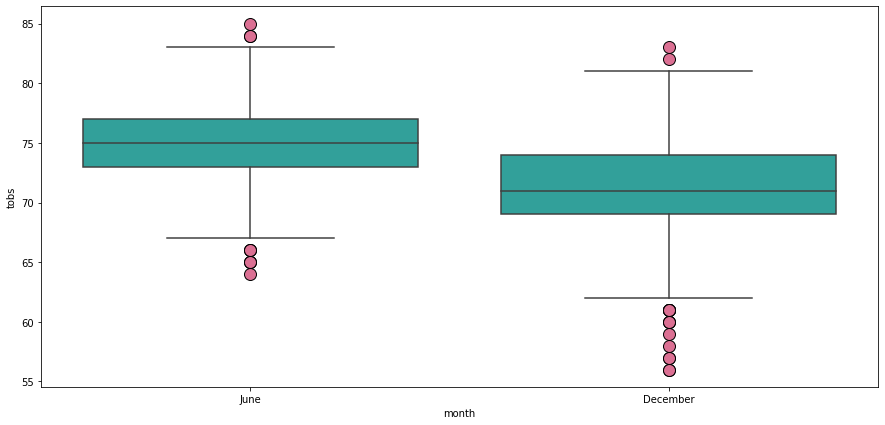

In [151]:
plt.figure(figsize=(15, 7))
flierprops = dict(marker='o', markerfacecolor="palevioletred", markersize=12,
                  markeredgecolor='black')
sns.boxplot(x='month',y='tobs',data=June_dec_df,color="lightseagreen",flierprops=flierprops)
plt.savefig('Images/june_dec_box.png')

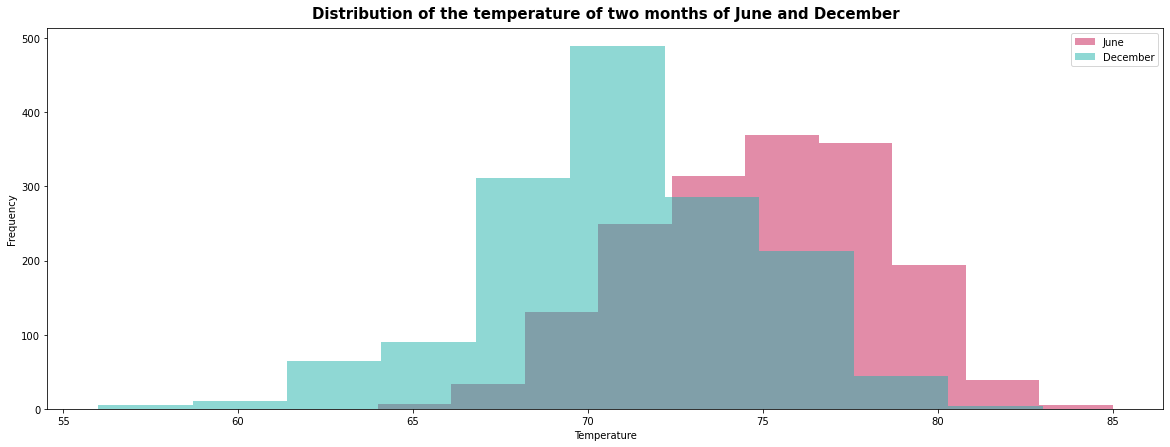

In [150]:
june_m =June_dec_df[June_dec_df['month'] == "June"]
Dec_m = June_dec_df[June_dec_df['month'] == "December"]
plt.figure(figsize=(20,7))
june_m['tobs'].plot(kind='hist',label='June',alpha=.8,color='palevioletred')
Dec_m['tobs'].plot(kind='hist',label='December',alpha=.5,color='lightseagreen')
plt.legend()
plt.title('Distribution of the temperature of two months of June and December',fontsize= 15,pad=10,fontweight="bold")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig('images/Distribution_june_dec.png')

In [135]:
# Create collections of temperature data
june =June_dec_df[June_dec_df['month'] == "June"]['tobs']
Dec = June_dec_df[June_dec_df['month'] == "December"]['tobs']

In [136]:
# Run paired t-test


# Python paired sample t-test
try:
    t_stat, p_val=stats.ttest_rel(june, Dec, nan_policy ='omit')
except:
    print("There is unequal sample sizes and can't use the paired t_test")


There is unequal sample sizes and can't use the paired t_test


The Shapiro-Wilk test is a statistical test used to check if a continuous variable follows a normal distribution. The null hypothesis (H0) states that the variable is normally distributed, and the alternative hypothesis (H1) states that the variable is NOT normally distributed. So after running this test:

If p ≤ 0.05: then the null hypothesis can be rejected (i.e. the variable is NOT normally distributed).

If p > 0.05: then the null hypothesis cannot be rejected (i.e. the variable MAY BE normally distributed).

In [137]:
#Checking the Normality of Data by shapiro test
print(f"{stats.shapiro(june)} for June")
print(f"{stats.shapiro(Dec)} for Decamber")


ShapiroResult(statistic=0.983282744884491, pvalue=3.5219510684594835e-13) for June
ShapiroResult(statistic=0.9843476414680481, pvalue=9.044617485520767e-12) for Decamber


So we can say that the data from both groups is not normally distributed.

In [138]:
#Checking the Homogeneity of Variances Assumption by levene test
stats.levene(june, Dec)

LeveneResult(statistic=11.486485455366319, pvalue=0.0007094853311953783)

The null hypothesis for Levene's test is that the groups we're comparing all have equal population variances. The p_value is less than  0.05 so population variances are not equal.

So we have a 2 unequal sample size that are not normally distributed and have different variances.

We will perform the non-parametric version of the two samples t-test, Mann-Whitney U Test, to determine if the groups differ in popularity. This test will allow us to test our hypothesis with non-normally distributed groups.

In [149]:
#performing Mann Whitney (non-parametric equivalent of the t-test)
stats.mannwhitneyu(june, Dec, alternative='two-sided')

MannwhitneyuResult(statistic=2015989.0, pvalue=5.749762815527068e-169)

The results of our Mann-Whitney U Test reveal that there is a statistically significant difference between June an December in popularity (p < 0.01), such that June temp (M = 74.944118) were more High compared to December temp (M = 71.041529).

Unpaired t_test for When comparing mean between two independent groups with unequal variance

In [114]:
# Run Welch’s t-test 

t_stat, p_val=stats.ttest_ind(june, Dec, equal_var=False)
print(f"t_test:{t_stat} , p_value={p_val}")

t_test:31.355036920962423 , p_value=4.193529835915755e-187


Now, the p-value of the test is 0.017106, which is less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that the June temp (M = 74.944118) were more High compared to December temp (M = 71.041529).


### More Analysis

In [140]:
# Filter data for desired months
June_df=df.loc[df.index.month_name()=='June']
June_df

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74


In [141]:
December_df=df.loc[df.index.month_name()=='December']
December_df

,station,prcp,tobs
date,,,
2010-12-01,USC00519397,0.04,76
2010-12-03,USC00519397,0.00,74
2010-12-04,USC00519397,0.00,74
2010-12-06,USC00519397,0.00,64
2010-12-07,USC00519397,0.00,64
...,...,...,...
2016-12-27,USC00516128,0.14,71
2016-12-28,USC00516128,0.14,71
2016-12-29,USC00516128,1.03,69


In [142]:
June_df['year']=pd.DatetimeIndex(June_df.index).year
December_df['year']=pd.DatetimeIndex(December_df.index).year


#### Temperature average per year in June and December

In [143]:
# Create collections of temperature data
june_df_year=June_df.groupby('year').mean()['tobs']
june_df_year.to_frame()

,tobs
year,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


In [144]:
Dec_df_year=December_df.groupby('year').mean()['tobs']
Dec_df_year.to_frame()

,tobs
year,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


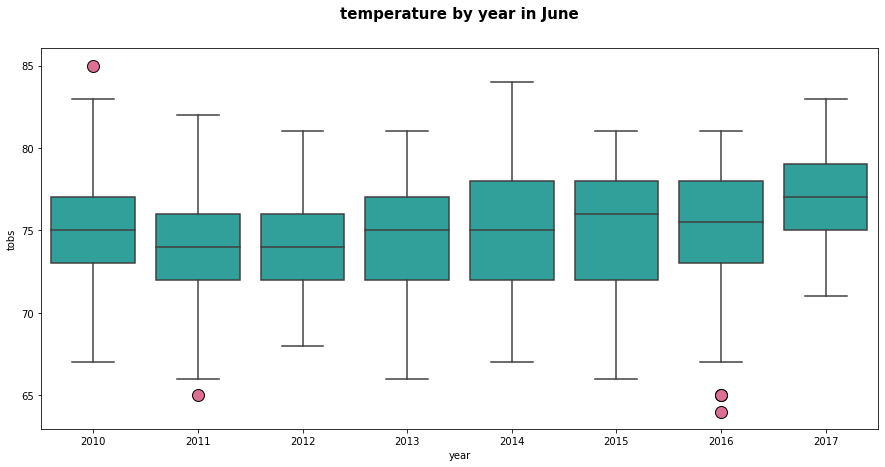

In [146]:
plt.figure(figsize=(15, 7))
flierprops = dict(marker='o', markerfacecolor="palevioletred", markersize=12,
                  markeredgecolor='black')
sns.boxplot(x='year',y='tobs',data=June_df,color="lightseagreen",flierprops=flierprops)
plt.title('temperature by year in June',fontsize= 15,pad=30,fontweight="bold")
plt.savefig('Images/june_box.png')

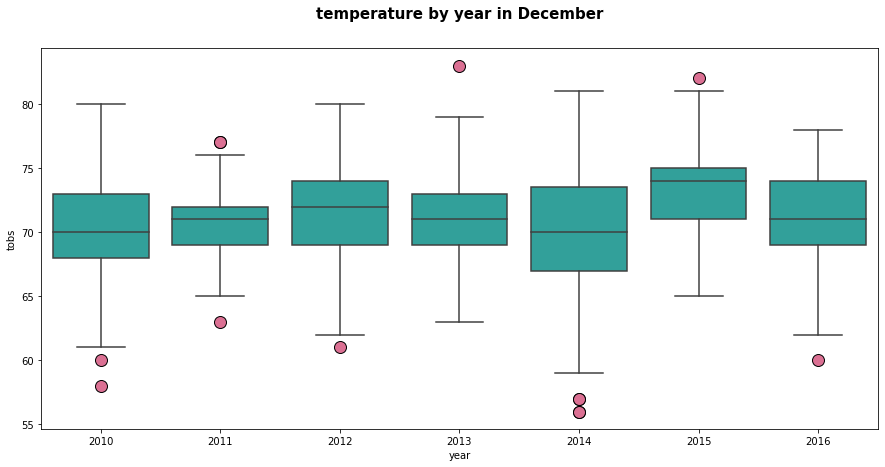

In [147]:
plt.figure(figsize=(15, 7))
flierprops = dict(marker='o', markerfacecolor="palevioletred", markersize=12,
                  markeredgecolor='black')
sns.boxplot(x='year',y='tobs',data=December_df,color="lightseagreen",flierprops=flierprops)
plt.title('temperature by year in December',fontsize= 15,pad=30,fontweight="bold")
plt.savefig('Images/dec_box.png')